In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import mglearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles

In [3]:
X,y=make_circles(noise=0.25,factor=0.5,random_state=1)

# we name the classes "blue"  and "red" for illustration purposes
y_named=np.array(['blue','red'])[y]

# we can all train_test_split with arbitrarily many arrays;
# all will be split in a constant manner
X_train,X_test,y_train_named,y_test_named,y_train,y_test = train_test_split(X,y_named,y,random_state=0)

# build the gradient boosting model
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train_named)

# The decision function
print("X_test.shape:{}".format(X_test.shape))
print("Decision function shape: {}".format(
    gbrt.decision_function(X_test).shape
))

X_test.shape:(25, 2)
Decision function shape: (25,)


In [6]:
print("Decision function:\n{}".format(gbrt.decision_function(X_test)))

Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081
 -7.69097179  4.11001686  1.10753937  3.40782222 -6.46255955  4.28986642
  3.90156346 -1.20031247  3.66166081 -4.17231157 -1.23010079 -3.91576223
  4.03602783  4.11001686  4.11001686  0.65709014  2.69826265 -2.65673274
 -1.86776596]


In [7]:
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [10]:
greater_zero=(gbrt.decision_function(X_test)>0).astype(int)
pred=gbrt.classes_[greater_zero]
print("pred is equal to predictions: {}".format(np.all(pred==gbrt.predict(X_test))))

pred is equal to predictions: True


In [11]:
decision_function=gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
    np.min(decision_function),np.max(decision_function)
))

Decision function minimum: -7.69 maximum: 4.29


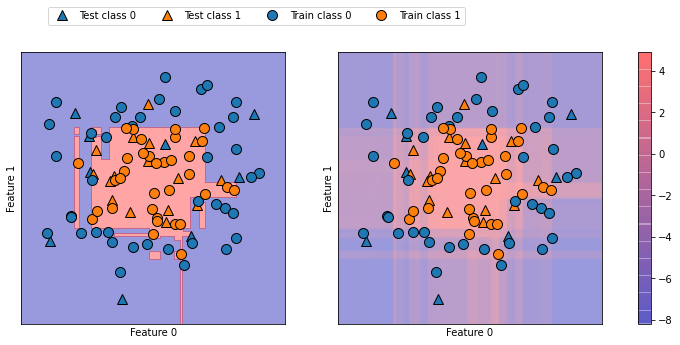

In [14]:
fig, axes=plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=0.4,cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

cbar=plt.colorbar(scores_image,ax=axes.tolist())

axes[0].legend(["Test class 0","Test class 1","Train class 0","Train class 1"],ncol=4,loc=(.1,1.1))

In [15]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [19]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


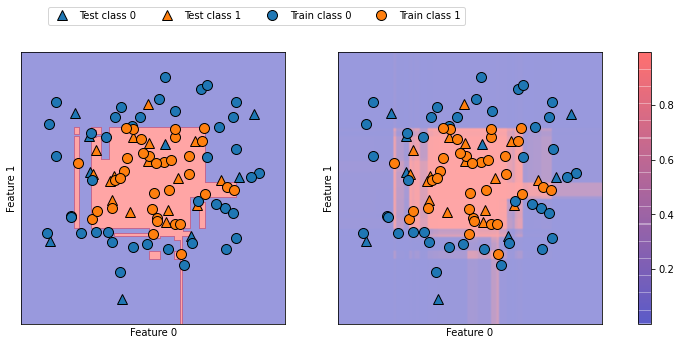

In [20]:
fig, axes=plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=0.4,cm=mglearn.ReBl,function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

cbar=plt.colorbar(scores_image,ax=axes.tolist())

axes[0].legend(["Test class 0","Test class 1","Train class 0","Train class 1"],ncol=4,loc=(.1,1.1))

In [21]:
from sklearn.datasets import load_iris

iris=load_iris()
X_train,X_test,y_train,y_test=train_test_split(
    iris.data,iris.target, random_state=42)

gbrt=GradientBoostingClassifier(learning_rate=0.01,random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [23]:
print("Decision function shape:{}".format(gbrt.decision_function(X_test).shape))
print("Decision function shape:\n{}".format(gbrt.decision_function(X_test)[:6,:]))

Decision function shape:(38, 3)
Decision function shape:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [24]:
print("Argmax of decision function:\n{}".format(
    np.argmax(gbrt.decision_function(X_test),axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [25]:
print("Predicted Probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6,:]))

Predicted Probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]


In [26]:
print("Argmax of Predicted probabilities:\n{}".format(
    np.argmax(gbrt.predict_proba(X_test),axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of Predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
